In [1]:
! pip install numpy h5py pandas

In [2]:
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Load the data (in h5 format)

In [3]:
Data_BSE  = h5.File('COMPAS_Output.h5')
Data_SSE  = h5.File('COMPAS_Output_SSE.h5')

Inspect the data

In [4]:
list(Data_BSE.keys())

['BSE_Common_Envelopes',
 'BSE_Double_Compact_Objects',
 'BSE_RLOF',
 'BSE_System_Parameters',
 'Run_Details']

In [5]:
list(Data_SSE.keys())

['Run_Details', 'SSE_Supernovae', 'SSE_System_Parameters']

In [6]:
CE_BSE = Data_BSE['BSE_Common_Envelopes']
list(CE_BSE.keys())
merger = CE_BSE['Merger'][()]
print(merger.shape)                   # number of systems in this file
print(merger[:5])                    # the values of the first 3 entries

(28214,)
[1 1 1 1 1]


In [7]:
SP_BSE = Data_BSE['BSE_System_Parameters']
SP_SSE = Data_SSE['SSE_System_Parameters']

In [8]:
list(SP_BSE.keys())

['ID',
 'Luminosity(1)',
 'Luminosity(2)',
 'Mass@ZAMS(1)',
 'Mass@ZAMS(2)',
 'Record_Type',
 'SEED',
 'Teff(1)',
 'Teff(2)']

In [9]:
list(SP_SSE.keys())

['Ang_Momentum',
 'CH_on_MS',
 'Evolution_Status',
 'Luminosity',
 'Mass',
 'Mass@ZAMS',
 'Mass_Env',
 'Metallicity@ZAMS',
 'Omega@ZAMS',
 'PO_LBV_Factor',
 'PO_Sigma_Kick_CCSN_BH',
 'PO_Sigma_Kick_CCSN_NS',
 'PO_Sigma_Kick_ECSN',
 'PO_Sigma_Kick_USSN',
 'PO_WR_Factor',
 'Radius@ZAMS',
 'Record_Type',
 'SEED',
 'SN_Kick_Magnitude_Random_Number',
 'Stellar_Type',
 'Stellar_Type@ZAMS',
 'Teff']

Finding the unit of a parameter

In [10]:
print(SP_BSE['Teff(1)'].attrs['units']) # attrs refers to attributes

b'K'


In [11]:
print(SP_BSE['Luminosity(1)'].attrs['units'])

b'Lsol'


In [12]:
L_BSE_1 = SP_BSE['Luminosity(1)'][()]
print(L_BSE_1.shape)                   # number of systems in this file
print(L_BSE_1[:5])                    # the values of the first 3 entries

(35000,)
[  4.8905156    7.50010698 195.24141506   0.7386654    4.25710272]


In [13]:
T_BSE_1 = SP_BSE['Teff(1)'][()]
print(T_BSE_1.shape)                   # number of systems in this file
print(T_BSE_1[:5])                    # the values of the first 3 entries

(35000,)
[ 7511.45599407  8252.30293479 14975.54867107  5821.34744331
  7308.713806  ]


In [14]:
L_BSE_2 = SP_BSE['Luminosity(2)'][()]
T_BSE_2 = SP_BSE['Teff(2)'][()]

In [15]:
L_SSE = SP_SSE['Luminosity'][()]
print(L_SSE.shape)                   # number of systems in this file
print(L_SSE[:5])                    # the values of the first 3 entries
T_SSE = SP_SSE['Teff'][()]
print(T_SSE.shape)                   # number of systems in this file
print(T_SSE[:5])                    # the values of the first 3 entries

(75000,)
[ 0.44208346  5.90186228 93.60656714  2.75878624  4.24579915]
(75000,)
[ 5378.08264143  7818.78582496 13344.80882652  6819.88165121
  7305.052703  ]


Entire HRD

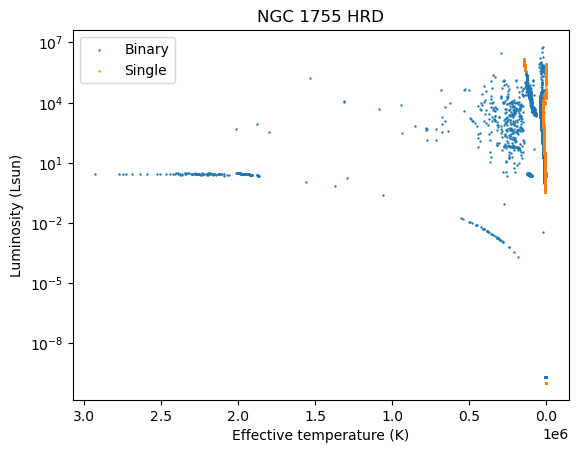

In [16]:
plt.scatter(T_BSE_1+T_BSE_2, L_BSE_1+L_BSE_2, label = 'Binary', s = 0.5)
plt.scatter(T_SSE, L_SSE, label = 'Single', s = 0.5)
plt.gca().invert_xaxis()
plt.title('NGC 1755 HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

Zoomed into MS

(0.1, 100000.0)

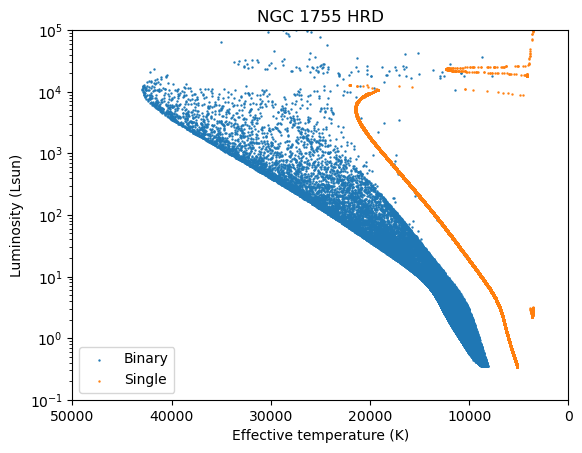

In [17]:
plt.scatter(T_BSE_1+T_BSE_2, L_BSE_1+L_BSE_2, label = 'Binary', s = 0.5)
plt.scatter(T_SSE, L_SSE, label = 'Single', s = 0.5)
plt.xlim((0,0.05e6))
plt.gca().invert_xaxis()
plt.title('NGC 1755 HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()
plt.ylim((1e-1,1e5))


In [18]:
df = pd.read_csv('n1755_decont.csv')
df = df.drop(columns = {'X', 'Y'})
df.head(3)

,F814W,F336W
0,20.7856,21.2180
1,20.5492,20.8215
2,21.4685,22.2934


Text(0.5, 1.0, 'NGC 1755')

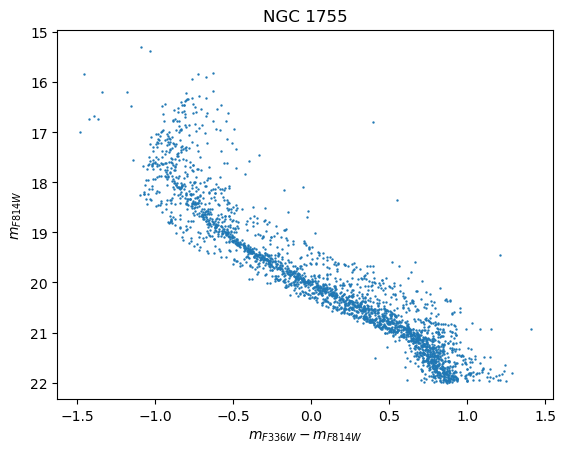

In [19]:
plt.scatter(df.F336W-df.F814W, df.F814W, s = 0.5)
plt.xlabel(r'$m_{F336W}-m_{F814W}$')
plt.ylabel(r'$m_{F814W}$')
plt.gca().invert_yaxis()
plt.title('NGC 1755')

In [20]:
def convert_to_lum(m):
  #refer to https://www.nature.com/articles/s41550-021-01597-5
  m = np.array(m)
  M = m - 18.29
  L = (3.0128e28)*np.power(10,-0.4*M) #in W
  L /= 3.827e+26 # in solar 
  return L

In [21]:
L = convert_to_lum(df.F814W)
L

array([  7.90445335,   9.82724629,   4.21416796, ..., 761.78398887,
       475.85193586, 486.26368894])

In [55]:
def convert_to_teff(mag_336, mag_814):
  colour = mag_336 - mag_814 # B - I 
  return 6800 - 4700*colour

def convert_to_teff(mag_336, mag_814):
  colour = mag_336 - mag_814 - 0.14
  return 4600*((1/(0.92*colour + 1.7)) + (1/(0.92*colour + 0.62)))

In [56]:
Teff = convert_to_teff(df.F336W, df.F814W)
print(np.max(Teff))

13771.509999999991


Text(0.5, 1.0, 'NGC 1755')

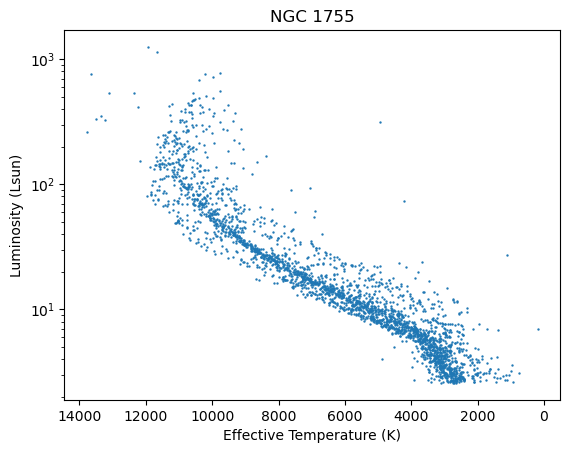

In [57]:
plt.scatter(Teff, L, s = 0.5)
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.gca().invert_xaxis()
plt.yscale('log')
plt.title('NGC 1755')

In [58]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [59]:
results_BSE = {'Teff': T_BSE_1+T_BSE_2,
           'L': L_BSE_1+L_BSE_2}

# Create DataFrame
simul_BSE = pd.DataFrame(results_BSE)
simul_BSE = restrict(simul_BSE, 'Teff', np.min(Teff), np.max(Teff))
simul_BSE = restrict(simul_BSE, 'L', np.min(L), np.max(L))

In [60]:
results_SSE = {'Teff': T_SSE,
           'L': L_SSE}

# Create DataFrame
simul_SSE = pd.DataFrame(results_SSE)
simul_SSE = restrict(simul_SSE, 'Teff', np.min(Teff), np.max(Teff))
simul_SSE = restrict(simul_SSE, 'L', np.min(L), np.max(L))

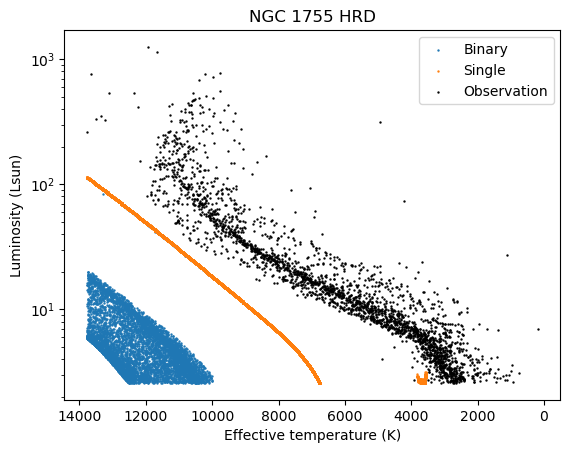

In [61]:
plt.scatter(simul_BSE.Teff, simul_BSE.L, label = 'Binary', s = 0.5)
plt.scatter(simul_SSE.Teff, simul_SSE.L, label = 'Single', s = 0.5)
plt.scatter(Teff, L, s = 0.5, c='k', label = 'Observation')
plt.gca().invert_xaxis()
plt.title('NGC 1755 HRD')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()
